In [1]:
from pycaret import regression
import pandas as pd
import numpy as np
import statistics
import math
# import mysql.connector
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pycaret.classification import *
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import pycaret

print(f'pycaret  version: {pycaret.__version__}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
%config InlineBackend.figure_format = 'retina'

pycaret  version: 2.3.6
pandas  version: 1.4.1
numpy   version: 1.19.5
seaborn version: 0.11.2


In [2]:
df = pd.read_csv("303I_dataprep_not_drop_col.csv")

In [3]:
df

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,Unnamed: 118
0,710902,BTG-LR3,RUN,20220307 124715,47:15.0,1305,4,12.869,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,332,256,6.7,168,1.8,140,42,45,41.6,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.1,37,21.4,0,398,393,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
1,710903,BTG-LR3,RUN,20220307 124730,47:30.0,1305,4,12.925,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,348,256,6.7,168,1.8,140,42,45,41.9,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,394,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
2,710904,BTG-LR3,RUN,20220307 124745,47:45.0,1305,4,12.955,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,341,255,6.7,169,1.8,140,42,45,41.8,34.5,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.4,0,398,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
3,710905,BTG-LR3,RUN,20220307 124800,48:00.0,1305,4,13.042,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,350,258,6.7,168,1.7,140,42,45,41.6,34.6,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.6,0,397,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
4,710906,BTG-LR3,RUN,20220307 124815,48:15.0,1305,4,13.094,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,364,259,6.7,168,1.7,140,43,45,41.6,34.6,58.0,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,392,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57

In [4]:
df = df[df['c_status'].isin(['RUN'])]
df['c_time'] = pd.to_datetime(df['c_time'])
df

,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,Unnamed: 118
0,710902,BTG-LR3,RUN,2022-03-07 12:47:15,47:15.0,1305,4,12.869,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,332,256,6.7,168,1.8,140,42,45,41.6,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.1,37,21.4,0,398,393,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
1,710903,BTG-LR3,RUN,2022-03-07 12:47:30,47:30.0,1305,4,12.925,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,348,256,6.7,168,1.8,140,42,45,41.9,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,394,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
2,710904,BTG-LR3,RUN,2022-03-07 12:47:45,47:45.0,1305,4,12.955,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,341,255,6.7,169,1.8,140,42,45,41.8,34.5,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.4,0,398,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
3,710905,BTG-LR3,RUN,2022-03-07 12:48:00,48:00.0,1305,4,13.042,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,350,258,6.7,168,1.7,140,42,45,41.6,34.6,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.6,0,397,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
4,710906,BTG-LR3,RUN,2022-03-07 12:48:15,48:15.0,1305,4,13.094,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,364,259,6.7,168,1.7,140,43,45,41.6,34.6,58.0,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,392,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69

In [5]:
df.to_csv('df_pellet_lr.csv')

In [6]:
df30 = pd.read_csv("df_pellet_lr.csv")
df30

,Unnamed: 0,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,n_feed_flowrate,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp2,n_temp3,n_temp4,n_total_lq1,c_fat_status,n_per_lq1,n_rpm_lq1,c_lq1_code,c_lq1_name,c_3way_status,n_sp_lq1,n_pv_lq1,n_sp_amp_pl,n_pv_amp_pl,n_flow_steam,n_steam_pressure1,n_steam_temp1,n_steam_pressure2,n_steam_temp2,n_per_valve1,n_max_valve1,n_product_temp,n_ambient_temp,n_airout_temp,c_steam_mode,c_way_cooler,n_min_feee_start,n_early_target,n_target_feed,n_max_capacity,n_amp_cond1,n_speed_cond1,n_amp_cond2,n_speed_cond2,n_rsm_left,n_rsm_right,n_gap,n_sp_gap,n_kwhr_pl,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,n_pdi,n_per_fine_fg,c_data_nir1,c_data_nir2,c_data_nir3,c_data_nir4,c_data_nir5,c_data_nir6,c_data_nir7,c_data_nir8,c_data_nir9,c_data_nir10,c_die_serial,n_die_hr,n_die_meter,c_rollerl_serial,n_rollerl_hr,n_rollerl_meter,c_rollerr_serial,n_rollerr_hr,n_rollerr_meter,c_rollerc_serial,n_rollerc_hr,n_rollerc_meter,PDI_USL,PDI_LSL,Fines_USL,Fines_LSL,FAT_add_Mixer,FAT_add_die,Water_add_Mixer,Die_Thickness_A,Die_Thickness_B,LD_Ratio,FPQF,Usage-40,Usage.-5,Usage2,Usage4,Usage5,Usage6,Usage7,Usage8,Usage10,Usage25,GFPQF-40,GFPQF.-5,GFPQF2,GFPQF4,GFPQF5,GFPQF6,GFPQF7,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,Unnamed: 118
0,0,710902,BTG-LR3,RUN,2022-03-07 12:47:15,47:15.0,1305,4,12.869,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,332,256,6.7,168,1.8,140,42,45,41.6,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.1,37,21.4,0,398,393,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
1,1,710903,BTG-LR3,RUN,2022-03-07 12:47:30,47:30.0,1305,4,12.925,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,348,256,6.7,168,1.8,140,42,45,41.9,34.6,57.8,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,394,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
2,2,710904,BTG-LR3,RUN,2022-03-07 12:47:45,47:45.0,1305,4,12.955,303I00000106,13.5,42,0.51,64,64,66,64,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,341,255,6.7,169,1.8,140,42,45,41.8,34.5,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.4,0,398,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
3,3,710905,BTG-LR3,RUN,2022-03-07 12:48:00,48:00.0,1305,4,13.042,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,350,258,6.7,168,1.7,140,42,45,41.6,34.6,57.9,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.4,37,21.6,0,397,395,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN
4,4,710906,BTG-LR3,RUN,2022-03-07 12:48:15,48:15.0,1305,4,13.094,303I00000106,13.5,42,0.51,64,63,66,63,63,0,0.0,OFF,0.0,0,NaN,NaN,CIRCULATE,0.1,0.0,430,364,259,6.7,168,1.7,140,43,45,41.6,34.6,58.0,CONTROL BY TEMP,1,10,4.0,13.5,12.0,19.5,37,21.6,0,398,392,0.0,0.0,0,0,0.0,0.0,10,96.2,2.4,0,0,0,0,0,0,0,0,0,0,249002-2,620054,1642.988,0,0,0,0,0,0,0,0,0,98.0,95.0,7.0,0.0,4.0,NaN,0.5,60.0,50.0,12.5,4.5537,NaN,NaN,1055.42,897.0,2860.6,NaN,108.0,479.0,NaN,NaN,NaN,NaN,0.3909,0.6644,2.6487,NaN,0.1400

In [7]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [8]:
list(df.columns)

['n_id',
 'c_plant_id',
 'c_status',
 'c_time',
 'd_time',
 'c_production',
 'n_line',
 'n_total_feed',
 'c_formula',
 'n_feed_flowrate',
 'n_per_feed',
 'n_density',
 'n_sp_temp1',
 'n_pv_temp1',
 'n_temp1',
 'n_temp2',
 'n_temp3',
 'n_temp4',
 'n_total_lq1',
 'c_fat_status',
 'n_per_lq1',
 'n_rpm_lq1',
 'c_lq1_code',
 'c_lq1_name',
 'c_3way_status',
 'n_sp_lq1',
 'n_pv_lq1',
 'n_sp_amp_pl',
 'n_pv_amp_pl',
 'n_flow_steam',
 'n_steam_pressure1',
 'n_steam_temp1',
 'n_steam_pressure2',
 'n_steam_temp2',
 'n_per_valve1',
 'n_max_valve1',
 'n_product_temp',
 'n_ambient_temp',
 'n_airout_temp',
 'c_steam_mode',
 'c_way_cooler',
 'n_min_feee_start',
 'n_early_target',
 'n_target_feed',
 'n_max_capacity',
 'n_amp_cond1',
 'n_speed_cond1',
 'n_amp_cond2',
 'n_speed_cond2',
 'n_rsm_left',
 'n_rsm_right',
 'n_gap',
 'n_sp_gap',
 'n_kwhr_pl',
 'n_kwhr_conveyor',
 'n_per_fine_return',
 'n_flow_fine_return',
 'n_max_fine_return',
 'n_pdi',
 'n_per_fine_fg',
 'c_data_nir1',
 'c_data_nir2',
 'c_dat

In [9]:
from pycaret.regression import *

In [10]:
reg1 = setup(data = df30, target = 'n_feed_flowrate',
             numeric_features = [
 'n_pv_temp1',
 'n_temp1',
 'n_temp2',
 'n_temp3',
 'n_per_lq1',
 'n_pv_lq1',
 'n_pv_amp_pl',
 'n_steam_pressure1',
 'n_steam_temp1',
 'n_steam_pressure2',
 'n_steam_temp2',
 'n_max_capacity',
 'n_rsm_left',
 'n_rsm_right',
 'n_gap',
 'n_die_hr',
 'n_die_meter',
 'FAT_add_Mixer',
 'FAT_add_die',
 'Water_add_Mixer',       
 'Die_Thickness_B',
 'LD_Ratio',
 'Usage-40',
 'Usage.-5',
 'Usage2',
 'Usage4',
 'Usage5',
 'Usage6',
 'Usage7',
 'Usage8',
 'Usage10',
 'Usage25',
 'GFPQF-40',
 'GFPQF.-5',
 'GFPQF2',
 'GFPQF4',
 'GFPQF5',
 'GFPQF6',
 'GFPQF7',
 'GFPQF8',
 'GFPQF10',
 'GFPQF25',
 'Moisture',
 'Protein',
 'FAT',
 'Fiber',
 'Ash',
 'FPQF',
 'n_flow_steam'],
             normalize = True, normalize_method = 'zscore',
             ignore_features = ['n_target_feed','n_id','c_plant_id','c_status','c_time','d_time','n_line','c_production',
                               'n_line','n_total_feed','c_formula','n_per_feed','n_density','n_sp_temp1','n_temp4',
                               'n_total_lq1','c_fat_status','n_per_lq1','n_rpm_lq1','c_lq1_code','c_lq1_name','c_3way_status',
                                'n_sp_lq1','n_sp_amp_pl','n_per_valve1','n_max_valve1','n_product_temp','n_ambient_temp',
                                'n_airout_temp','c_steam_mode','c_way_cooler','n_min_feee_start','n_early_target',
                                'n_amp_cond1','n_speed_cond1','n_amp_cond2','n_speed_cond2','n_sp_gap','n_kwhr_pl','n_kwhr_conveyor',
                                'n_per_fine_return','n_flow_fine_return','n_max_fine_return','n_pdi','n_per_fine_fg','c_data_nir1',
                                'c_data_nir2','c_data_nir3','c_data_nir4','c_data_nir5','c_data_nir6','c_data_nir7','c_data_nir8',
                                'c_data_nir9','c_data_nir10','c_die_serial','c_rollerl_serial','n_rollerl_hr','n_rollerl_meter',
                                'c_rollerr_serial','n_rollerr_hr','n_rollerr_meter','c_rollerc_serial','n_rollerc_hr','n_rollerc_meter',
                                'PDI_USL','PDI_LSL','Fines_USL','Fines_LSL','Die_Thickness_A'],
             train_size=0.7,
             use_gpu=True,
             categorical_imputation='mode',
             remove_outliers = True)

,Description,Value
0,session_id,2590
1,Target,n_feed_flowrate
2,Original Data,"(20493, 120)"
3,Missing Values,1
4,Numeric Features,49
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(13627, 35)"


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0004,0.0001,0.0076,0.9998,0.0006,0.0000,1.0960
rf,Random Forest Regressor,0.0013,0.0009,0.0227,0.9985,0.0015,0.0001,1.5170
lightgbm,Light Gradient Boosting Machine,0.0060,0.0011,0.0301,0.9982,0.0020,0.0005,0.9160
knn,K Neighbors Regressor,0.0047,0.0015,0.0381,0.9975,0.0027,0.0004,0.6000
dt,Decision Tree Regressor,0.0011,0.0023,0.0359,0.9963,0.0024,0.0001,0.1080
gbr,Gradient Boosting Regressor,0.0438,0.0073,0.0850,0.9880,0.0059,0.0034,2.0810
lr,Linear Regression,0.1721,0.0647,0.2539,0.8937,0.0184,0.0135,0.0240
br,Bayesian Ridge,0.1715,0.0647,0.2540,0.8937,0.0184,0.0134,0.0580
ridge,Ridge Regression,0.1684,0.0670,0.2583,0.8899,0.0188,0.0132,0.0300
par,Passive Aggressive Regressor,0.1893,0.0886,0.2968,0.8546,0.0216,0.0148,0.0820


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2590, verbose=0, warm_start=False)

In [12]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0003,0.0000,0.0061,0.9999,0.0005,0.0000
1,0.0003,0.0000,0.0058,1.0000,0.0005,0.0000
2,0.0003,0.0000,0.0050,1.0000,0.0003,0.0000
3,0.0003,0.0000,0.0029,1.0000,0.0002,0.0000
4,0.0001,0.0000,0.0014,1.0000,0.0001,0.0000
5,0.0010,0.0009,0.0305,0.9985,0.0021,0.0001
6,0.0005,0.0001,0.0073,0.9999,0.0006,0.0000
7,0.0002,0.0000,0.0034,1.0000,0.0002,0.0000
8,0.0005,0.0001,0.0110,0.9998,0.0010,0.0000
9,0.0002,0.0000,0.0024,1.0000,0.0002,0.0000


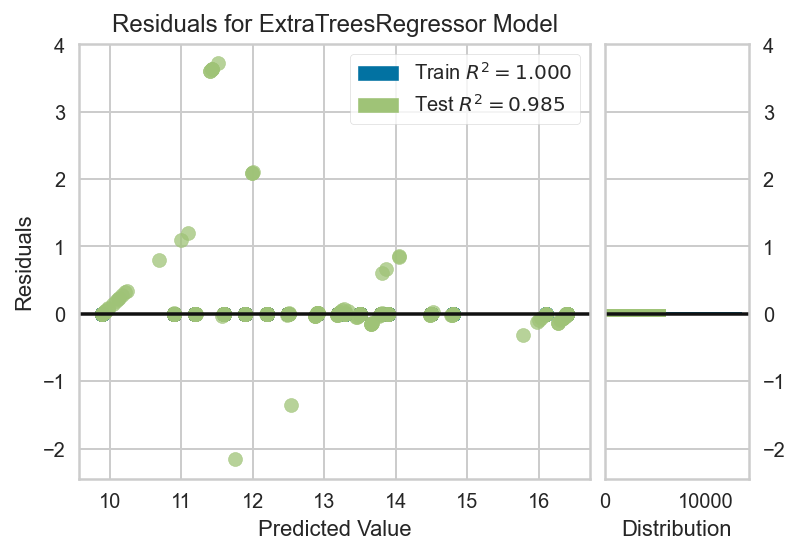

In [13]:
plot_model(model)

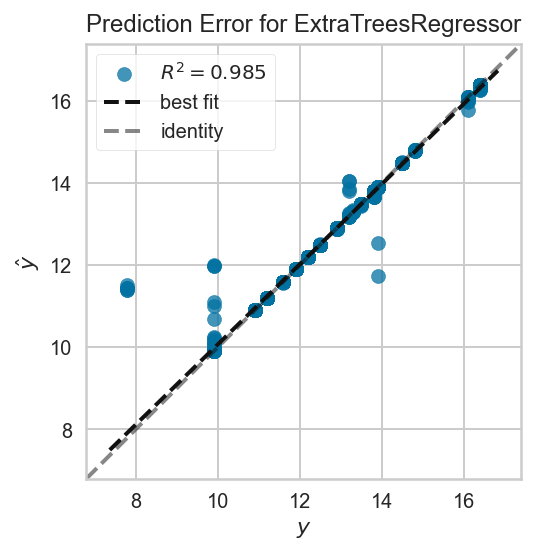

In [14]:
plot_model(model, plot = 'error')

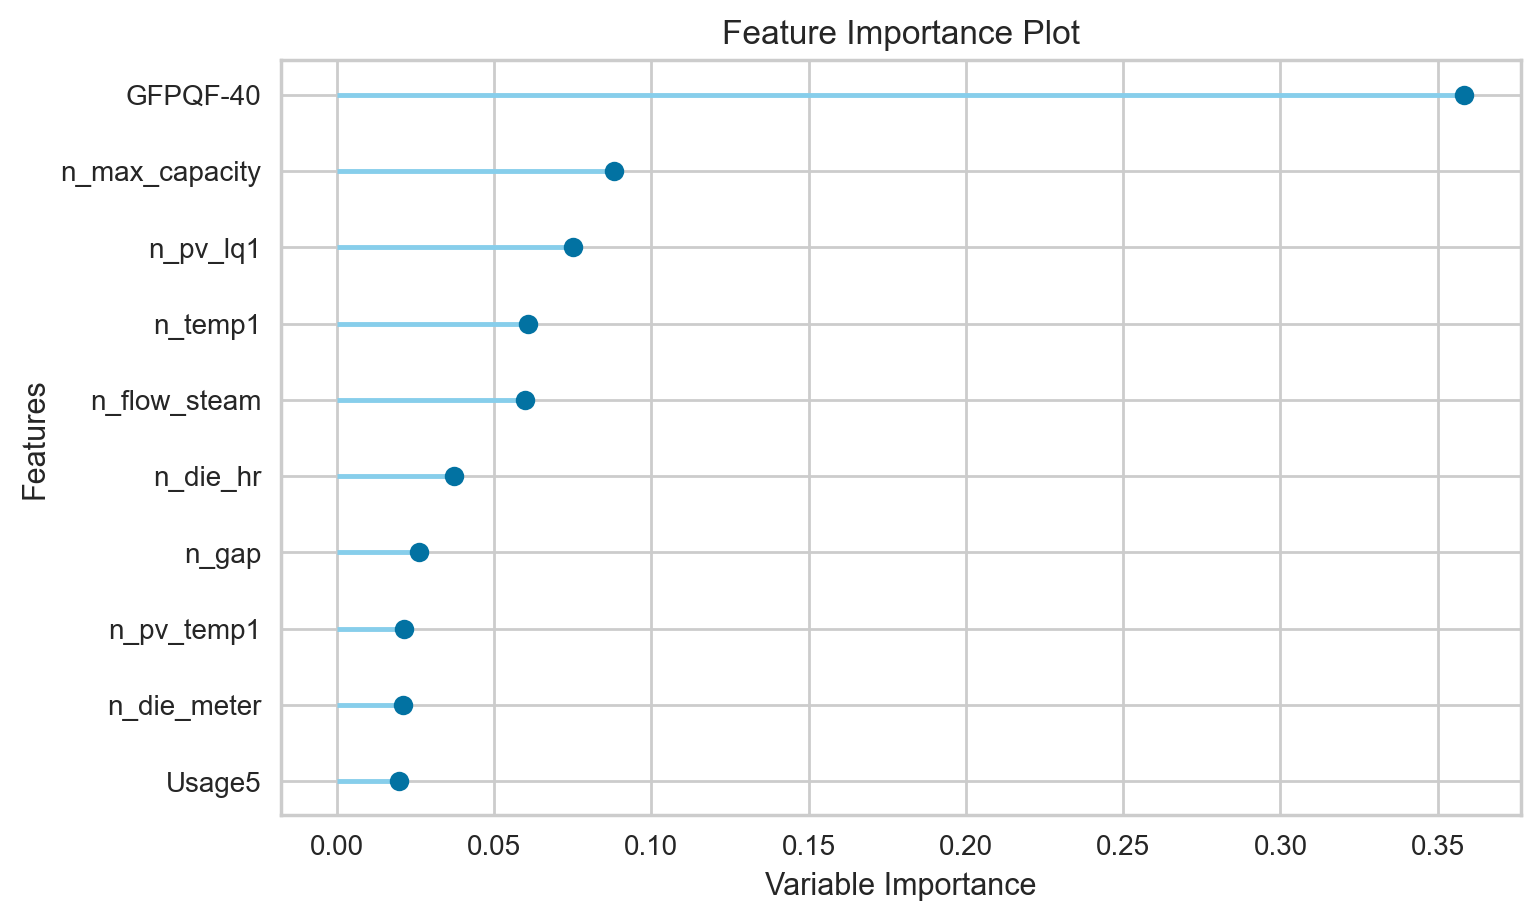

In [15]:
plot_model(model, plot='feature')

In [16]:
predictions = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0072,0.0172,0.1310,0.9848,0.0120,0.0008


In [17]:
save_model(model, '303I_lr3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['n_target_feed', 'n_id',
                                                        'c_plant_id', 'c_status',
                                                        'c_time', 'd_time',
                                                        'n_line', 'c_production',
                                                        'n_line', 'n_total_feed',
                                                        'c_formula',
                                                        'n_per_feed',
                                                        'n_density',
                                                        'n_sp_temp1', 'n_temp4',
                                                        'n_total_lq1',
                                                        'c_fat_

In [18]:
model_303I_lr3 = load_model('303I_lr3')

Transformation Pipeline and Model Successfully Loaded


In [19]:
test_data_classification = pd.read_csv('df_pellet_lr.csv')

predictions = regression.predict_model(model_303I_lr3, data=test_data_classification)
# view the predictions
predictions

,Unnamed: 0,n_id,c_plant_id,c_status,c_time,d_time,c_production,n_line,n_total_feed,c_formula,...,GFPQF8,GFPQF10,GFPQF25,Moisture,Protein,FAT,Fiber,Ash,Unnamed: 118,Label
0,0,710902,BTG-LR3,RUN,2022-03-07 12:47:15,47:15.0,1305,4,12.869,303I00000106,...,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN,13.5
1,1,710903,BTG-LR3,RUN,2022-03-07 12:47:30,47:30.0,1305,4,12.925,303I00000106,...,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN,13.5
2,2,710904,BTG-LR3,RUN,2022-03-07 12:47:45,47:45.0,1305,4,12.955,303I00000106,...,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN,13.5
3,3,710905,BTG-LR3,RUN,2022-03-07 12:48:00,48:00.0,1305,4,13.042,303I00000106,...,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN,13.5
4,4,710906,BTG-LR3,RUN,2022-03-07 12:48:15,48:15.0,1305,4,13.094,303I00000106,...,0.7096,NaN,NaN,11.69,16.21,4.0,2.31,5.57,NaN,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20488,20488,506782,BTG-LR3,RUN,2022-01-29 13:13:30,13:30.0,1115,4,45.990,303I00000104,...,NaN,NaN,NaN,11.76,16.21,4.9,2.48,5.42,NaN,12.9
20489,20489,506783,BTG-LR3,RUN,2022-01-29 13:13:45,13:45.0,1115,4,46.040,303I00000104,...,NaN,NaN,NaN,11.76,16.21,4.9,2.48,5.42,NaN,12.9
20490,20490,506784,BTG-LR3,RUN,2022-01-29 13:14:00,14:00.0,1115,4,46.094,303I00000104,...,NaN,NaN,NaN,11.76,16.21,4.9,2.48,5.42,NaN,12.9
20491,20491,506785,BTG-LR3,RUN,2022-01-29 13:14:15,14:15.0,1115,4,46.147,303I00000104,...,NaN,NaN,NaN,11.76,16.21,4.9,2.48,5.42,NaN,12.9


In [20]:
predictions[['n_total_feed','c_formula','n_per_feed','n_density','n_sp_temp1','n_pv_temp1','n_temp1'
             ,'n_temp1','n_temp2','n_temp3','n_total_lq1','c_fat_status','n_per_lq1','n_rpm_lq1'
             ,'c_lq1_code','c_lq1_name','c_3way_status','n_sp_lq1','n_pv_lq1','n_flow_steam','n_steam_pressure1'
             ,'n_steam_temp1','n_steam_pressure2','n_steam_temp2','n_per_valve1','n_max_valve1','n_product_temp'
             ,'n_ambient_temp','n_airout_temp','c_steam_mode','c_way_cooler','n_min_feee_start','n_early_target'
             ,'n_target_feed','n_amp_cond1','n_speed_cond1','n_amp_cond2','n_speed_cond2'
             ,'n_rsm_left','n_rsm_right','n_gap','n_sp_gap','n_kwhr_pl','n_kwhr_conveyor','n_per_fine_return'
             ,'n_flow_fine_return','n_max_fine_return','c_die_serial','n_die_hr','n_die_meter'
             ,'FPQF','n_feed_flowrate','Label']]

,n_total_feed,c_formula,n_per_feed,n_density,n_sp_temp1,n_pv_temp1,n_temp1,n_temp1,n_temp2,n_temp3,...,n_kwhr_conveyor,n_per_fine_return,n_flow_fine_return,n_max_fine_return,c_die_serial,n_die_hr,n_die_meter,FPQF,n_feed_flowrate,Label
0,12.869,303I00000106,42,0.51,64,64,66,66,64,63,...,0,0.0,0.0,10,249002-2,620054,1642.988,4.5537,13.5,13.5
1,12.925,303I00000106,42,0.51,64,64,66,66,64,63,...,0,0.0,0.0,10,249002-2,620054,1642.988,4.5537,13.5,13.5
2,12.955,303I00000106,42,0.51,64,64,66,66,64,63,...,0,0.0,0.0,10,249002-2,620054,1642.988,4.5537,13.5,13.5
3,13.042,303I00000106,42,0.51,64,63,66,66,63,63,...,0,0.0,0.0,10,249002-2,620054,1642.988,4.5537,13.5,13.5
4,13.094,303I00000106,42,0.51,64,63,66,66,63,63,...,0,0.0,0.0,10,249002-2,620054,1642.988,4.5537,13.5,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20488,45.990,303I00000104,40,0.51,68,68,206,206,68,67,...,0,0.0,0.0,10,209004-6,8336263,105315.656,3.7790,12.9,12.9
20489,46.040,303I00000104,40,0.51,68,68,206,206,68,67,...,0,0.0,0.0,10,209004-6,8336263,105315.656,3.7790,12.9,12.9
20490,46.094,303I00000104,40,0.51,68,68,206,206,68,67,...,0,0.0,0.0,10,209004-6,8336263,105315.656,3.7790,12.9,12.9
20491,46.147,303I00000104,40,0.51,68,68,206,206,68,67,...,0,0.0,0.0,10,209004-6,8336263,105315.656,3.7790,12.9,12.9
